In [96]:
%matplotlib inline

import os 
import json
import pandas as pd

import pycoco as pcc

In [100]:
output_dir = "/Users/berto/projects/SDSS_sims/lcs/"
# output_dir = "/Users/berto/projects/SDSS_sims/testing/lcs/"
outlist = os.listdir(output_dir)
outlist = [i for i in outlist if i != ".DS_Store"]

# log_dir = "/Users/berto/projects/SDSS_sims/testing/logs/"
log_dir = "/Users/berto/projects/SDSS_sims/logs/"
log_list = os.listdir(log_dir)
log_list = [i for i in log_list if i != ".DS_Store"]

In [101]:
outlist

['SN_000001.dat',
 'SN_000002.dat',
 'SN_000003.dat',
 'SN_000004.dat',
 'SN_000005.dat',
 'SN_000006.dat',
 'SN_000007.dat',
 'SN_000008.dat',
 'SN_000009.dat',
 'SN_000010.dat',
 'SN_000011.dat',
 'SN_000012.dat',
 'SN_000013.dat',
 'SN_000014.dat',
 'SN_000015.dat',
 'SN_000016.dat',
 'SN_000017.dat',
 'SN_000018.dat',
 'SN_000019.dat',
 'SN_000020.dat',
 'SN_000021.dat',
 'SN_000022.dat',
 'SN_000023.dat',
 'SN_000024.dat',
 'SN_000025.dat',
 'SN_000026.dat',
 'SN_000027.dat',
 'SN_000028.dat',
 'SN_000029.dat',
 'SN_000030.dat',
 'SN_000031.dat',
 'SN_000032.dat',
 'SN_000033.dat',
 'SN_000034.dat',
 'SN_000035.dat',
 'SN_000036.dat',
 'SN_000037.dat',
 'SN_000038.dat',
 'SN_000039.dat',
 'SN_000040.dat',
 'SN_000041.dat',
 'SN_000042.dat',
 'SN_000043.dat',
 'SN_000044.dat',
 'SN_000045.dat',
 'SN_000046.dat',
 'SN_000047.dat',
 'SN_000048.dat',
 'SN_000049.dat',
 'SN_000050.dat',
 'SN_000051.dat',
 'SN_000052.dat',
 'SN_000053.dat',
 'SN_000054.dat',
 'SN_000055.dat',
 'SN_00005

In [77]:
log_list

['LOG_SN_000001.json',
 'LOG_SN_000002.json',
 'LOG_SN_000003.json',
 'LOG_SN_000004.json',
 'LOG_SN_000005.json',
 'LOG_SN_000006.json',
 'LOG_SN_000007.json',
 'LOG_SN_000008.json',
 'LOG_SN_000009.json',
 'LOG_SN_000010.json']

/Users/berto/projects/SDSS_sims/lcs/SN_000001.dat


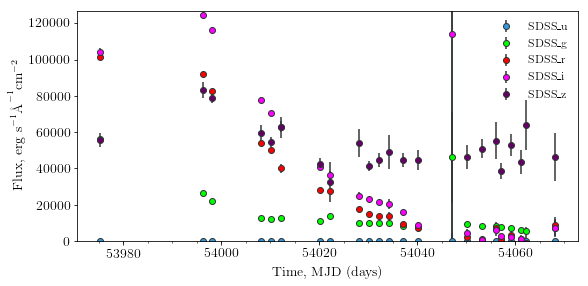

/Users/berto/projects/SDSS_sims/lcs/SN_000002.dat


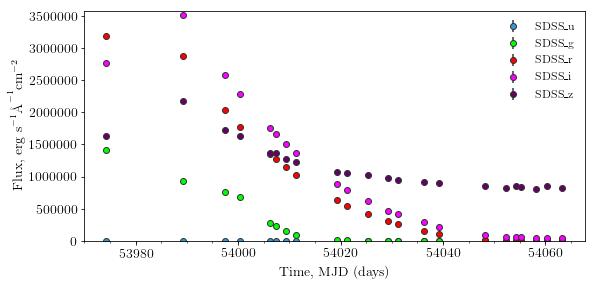

/Users/berto/projects/SDSS_sims/lcs/SN_000003.dat


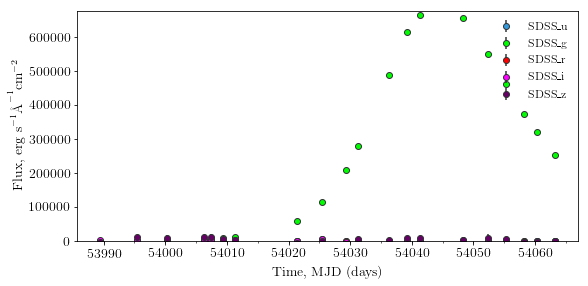

/Users/berto/projects/SDSS_sims/lcs/SN_000004.dat


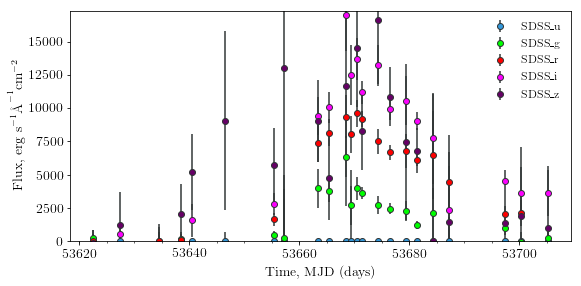

/Users/berto/projects/SDSS_sims/lcs/SN_000005.dat


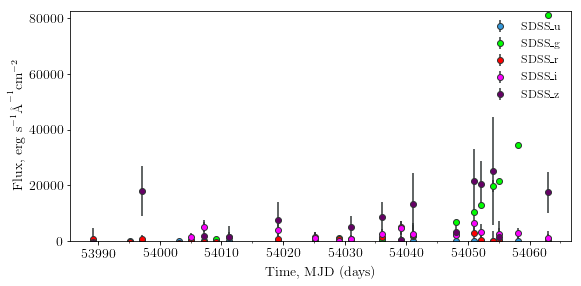

/Users/berto/projects/SDSS_sims/lcs/SN_000006.dat


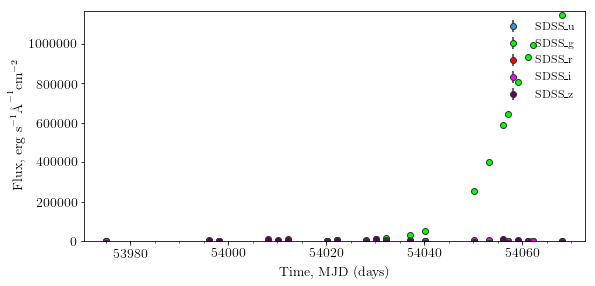

/Users/berto/projects/SDSS_sims/lcs/SN_000007.dat


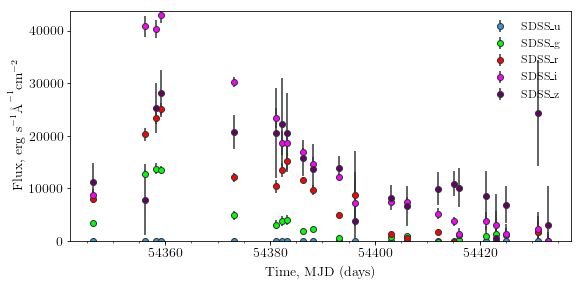

/Users/berto/projects/SDSS_sims/lcs/SN_000008.dat


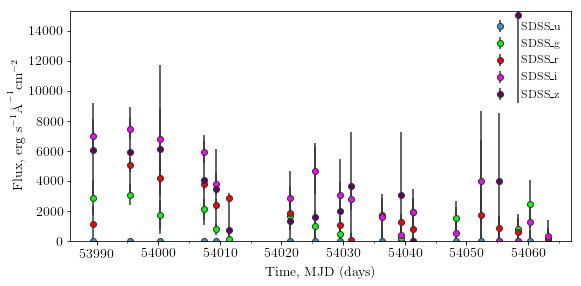

/Users/berto/projects/SDSS_sims/lcs/SN_000009.dat


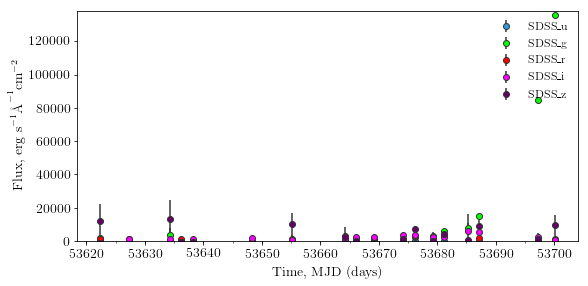

/Users/berto/projects/SDSS_sims/lcs/SN_000010.dat


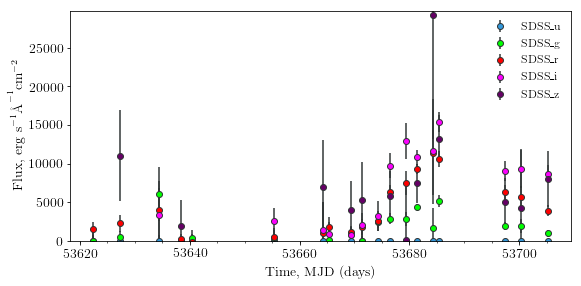

/Users/berto/projects/SDSS_sims/lcs/SN_000011.dat


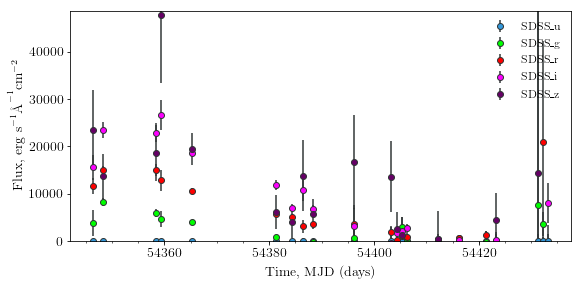

/Users/berto/projects/SDSS_sims/lcs/SN_000012.dat


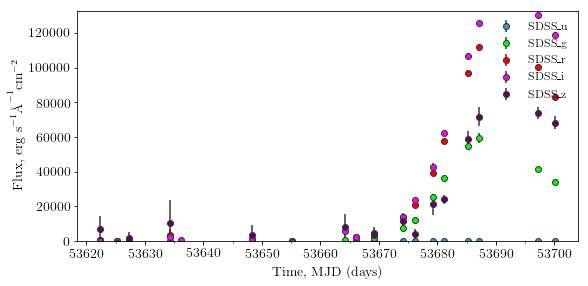

In [102]:
verbose = True
for i, snpath in enumerate(outlist):
    snpath = os.path.join(output_dir, snpath)
    if verbose: print(snpath)
    p = pcc.PhotometryClass()
    p.load(snpath)

    p.plot()
    if i > 10:
        break

In [103]:
# df = pd.DataFrame()

alldata = {}
list_list = ["host_EBV", "mjdmax", "z_sim"]
for j, snlog in enumerate(log_list):
    snlog = os.path.join(log_dir, snlog)
    print(snlog)
    with open(snlog, "r") as json_file:  
        data = json.load(json_file)
        json_file.close()
    if j == 0:
        for keystring in data.keys():
            if keystring != "flux" and keystring != "w":
                alldata[keystring] = []
            
    for keystring in data.keys():
        if keystring != "flux" and keystring != "w":
            if keystring in list_list:
                alldata[keystring].append(data[keystring][0])
            else:
                alldata[keystring].append(data[keystring])
            
            
            

/Users/berto/projects/SDSS_sims/logs/LOG_SN_000001.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000002.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000003.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000004.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000005.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000006.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000007.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000008.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000009.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000010.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000011.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000012.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000013.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000014.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000015.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000016.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_000017.json
/Users/berto/projects/SDSS_sims/logs/LOG_SN_0000

In [91]:
alldata

{'CCD_index': [356, 5, 504, 470, 60, 480, 347, 30, 66, 497],
 'MW_EBV': [0.03200000000000002,
  0.17300000000000001,
  0.08300000000000013,
  0.03699999999999995,
  0.08799999999999994,
  0.1180000000000002,
  0.018999999999999972,
  0.10400000000000008,
  0.10299999999999988,
  0.12599999999999992],
 'field': ['82N',
  '82S',
  '82N',
  '82N',
  '82N',
  '82N',
  '82S',
  '82N',
  '82S',
  '82N'],
 'field_index': [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 'gentime': ['2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395',
  '2017-06-19 15:10:48.989395'],
 'host_EBV': [0.05031173196768612,
  0.009908275333380005,
  0.17382960145931897,
  0.001717332193431983,
  0.010881650411439276,
  0.1914029250876575,
  0.0642792163978521,
  0.2230757118080418,
  0.329575531358106,
 

In [104]:
output_df = pd.DataFrame.from_dict(alldata)

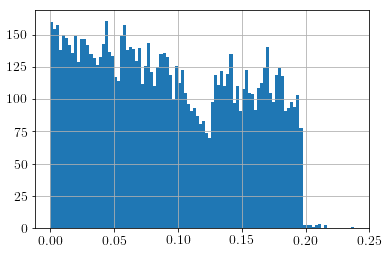

In [109]:
output_df["z_sim"].hist(bins = 100)

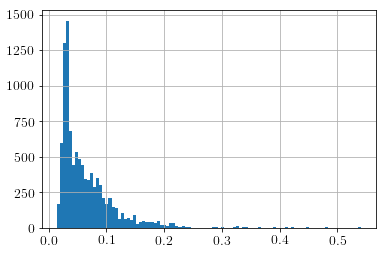

In [111]:
output_df["MW_EBV"].hist(bins=100)

TypeError: str() argument 2 must be str, not int